# Imports

In [51]:
import os
import pandas as pd
import numpy as np
import sklearn

from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
from wordcloud import WordCloud, STOPWORDS

# import plotly.express as px
import matplotlib.pyplot as plt

# Preprocessing

## Loading datasets

In [2]:
path = '/Users/joshuawong/Desktop/dataset_1'

os.chdir(path)
os.listdir()

['EDA.ipynb', '.DS_Store', 'Fake.csv', 'images', 'True.csv']

In [20]:
# Reading CSV files
fake = pd.read_csv('Fake.csv')
true = pd.read_csv('True.csv')

# Defing new column with class label
fake['class_label'] = 'Fake'
true['class_label'] = 'True'

# Combining datasets
df = pd.concat([true, fake], ignore_index=True)
df

,title,text,subject,date,class_label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",Fake
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",Fake


In [22]:
# Combine title and text columns
df['text'] = df['title'] + ' ' + df['text']

# Drop date and title columns
df = df.drop(columns=['date', 'title'])
df

,text,subject,class_label
0,"As U.S. budget fight looms, Republicans flip t...",politicsNews,True
1,U.S. military to accept transgender recruits o...,politicsNews,True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,politicsNews,True
3,FBI Russia probe helped by Australian diplomat...,politicsNews,True
4,Trump wants Postal Service to charge 'much mor...,politicsNews,True
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,Middle-east,Fake
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,Middle-east,Fake
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Middle-east,Fake
44896,How to Blow $700 Million: Al Jazeera America F...,Middle-east,Fake


## Preprocessing for Wordclouds

In [76]:
# Testing preprocessing function for wordclouds, which require a string as input
text = df['text'][0] # Declare sample text for preprocessing from df
print(text+'\n\n') # Uncomment to see original text
remove_punctuations = ''.join([word for word in text if word not in string.punctuation and word not in ['“', '”', '’', '‘']])
lowercase = remove_punctuations.lower()
tokenize = word_tokenize(lowercase)
stopwords_removed = [word for word in tokenize if word not in STOPWORDS]
# stemmed = [PorterStemmer().stem(word) for word in stopwords_removed] # Not sure if we need to stem here for the wordclouds
lemmatized = [WordNetLemmatizer().lemmatize(word) for word in stopwords_removed]
preprocessed_text = " ".join(stopwords_removed) # Join back all tokenized words into a string
preprocessed_text # Once satisfied, make into function

As U.S. budget fight looms, Republicans flip their fiscal script As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military sp

'us budget fight looms republicans flip fiscal script us budget fight looms republicans flip fiscal script washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers will begin trying pass federal budget fight likely linked issues immigration policy even november congressional election campaigns approach republicans will seek keep control congress president donald trump republicans want big budget increase military spending democrats want proportional increases nondefense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration already willing say going increase nondefense discreti

In [ ]:
def preprocess(text):
    remove_punctuations = ''.join([word for word in text if word not in string.punctuation and word not in ['“', '”', '’', '‘']])
    lowercase = remove_punctuations.lower()
    tokenized = word_tokenize(lowercase)
    stopwords_removed = [word for word in tokenized if word not in STOPWORDS]
    lemmatized = [WordNetLemmatizer().lemmatize(word) for word in stopwords_removed]
    preprocessed_text = " ".join(stopwords_removed)
    return preprocessed_text

# Apply function to text column and create new column for use later with wordclouds
df['text_preprocessed'] = df['text'].apply(preprocess)

## Word embedding model

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
fdist = nltk.FreqDist(haze)

In [50]:


vectors = vectorizer.fit_transform([documentA, documentB])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

SyntaxError: invalid syntax (<ipython-input-50-c1f3428496b5>, line 6)

# EDA

## Class distribution

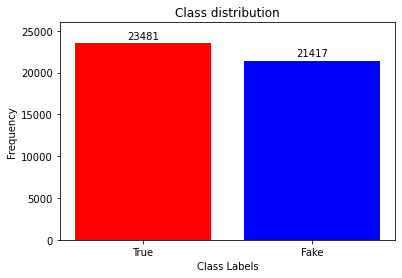

In [23]:
x = df['class_label'].unique()
y = df['class_label'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+500,y[i], ha='center') # Second element - adjust space above bar to plot the label

fig = plt.figure()
plt.ylim([0, 26000]) # Set y-axis limits
plt.bar(x,y, color={'blue', 'red'})
plt.title('Class distribution')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

# plt.savefig('images/class_distribution.png')


## Subjects distribution

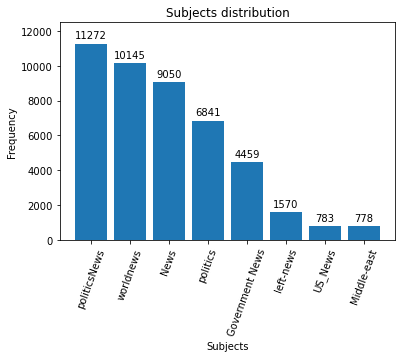

In [24]:
x = df['subject'].unique()
y = df['subject'].value_counts().values

def add_labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+300,y[i], ha='center') # Second element - adjust space above bar to plot the label

plt.figure()
plt.ylim([0, 12500]) # Set y-axis limits
plt.bar(x,y)
plt.xticks(rotation=70)
plt.title('Subjects distribution')
plt.xlabel('Subjects')
plt.ylabel('Frequency')
add_labels(x,y)
plt.show()

# plt.savefig('images/category_counts.png')

# Wordclouds

In [70]:
# Defining stopwords
stopwords_list = list(set(stopwords.words('english') + list(STOPWORDS))) # combine NLTK stopwords and wordcloud STOPWORDS
stopwords_list[:10] # Show some examples of stopwords

['it', 'to', 'that', 'too', 'ma', 'what', 'was', 'its', 'ourselves', 'because']

## All words

In [68]:
# Create wordcloud string to pass into wordcloud
wordcloud_string1 = ""
for text in df['text_preprocessed']:
    wordcloud_string1 += text

wordcloud_string[:500] # Show output string

'us budget fight looms republicans flip fiscal script us budget fight looms republicans flip fiscal script washington reuters head conservative republican faction us congress voted month huge expansion national debt pay tax cuts called fiscal conservative sunday urged budget restraint 2018 keeping sharp pivot way among republicans us representative mark meadows speaking cbs face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers will begin '

In [72]:
fdist = nltk.FreqDist(wordcloud_string1.split(' '))
most_common = fdist.most_common(22)

In [73]:
most_common

[('s', 174290),
 ('trump', 136097),
 ('said', 128323),
 ('us', 71507),
 ('president', 53856),
 ('will', 52515),
 ('t', 43220),
 ('people', 42080),
 ('one', 36758),
 ('new', 34077),
 ('state', 33187),
 ('house', 30512),
 ('donald', 29090),
 ('obama', 28816),
 ('reuters', 28749),
 ('clinton', 28628),
 ('government', 27645),
 ('states', 27594),
 ('republican', 26052),
 ('white', 25113),
 ('video', 24432),
 ('united', 23772)]

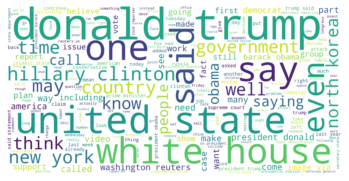

In [44]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
cloud.to_file('images2/wordcloud_all.png')

## Fake only

In [45]:
# Create wordcloud string to pass into wordcloud
wordcloud_string2 = ""
for text in df['text_preprocessed'][df['class_label']=='Fake']:
    wordcloud_string2 += text

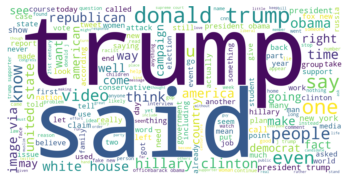

In [46]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
cloud.to_file('images2/wordcloud_fake.png')

## True only

In [47]:
# Create wordcloud string to pass into wordcloud
wordcloud_string3 = ""
for text in df['text_preprocessed'][df['class_label']=='True']:
    wordcloud_string3 += text

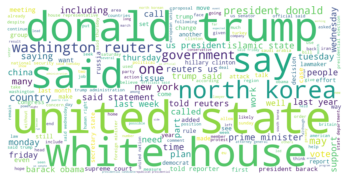

In [48]:
# Define wordcloud
cloud = WordCloud(background_color='white', stopwords = stopwords_list, width=2000, height=1000).generate(wordcloud_string)

# Plot
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Saving file
cloud.to_file('images2/wordcloud_true.png')